In [10]:
import numpy as np
from matplotlib import pyplot as plt

def vector_pair_angle(x_list, y_list, step_size):
    """
    Returns the angles between list of i and j coordinates.

    based off https://stackoverflow.com/questions/14631776/calculate-turning-points-pivot-points-in-trajectory-path

    Parameters:
    dir is a 2D-array of shape (N,M) representing N vectors in M-dimensional space.

    The return value is a 1D-array of values of shape (N-1,), with each value
    between 0 and pi.

    0 implies the vectors point in the same direction
    pi/2 implies the vectors are orthogonal
    pi implies the vectors point in opposite directions
    """
    
    vec_start = []
    vec_end = []
    
    centre_x_list = x_list[step_size:-step_size]
    start_x_list  = x_list[step_size*2:]
    end_x_list    = x_list[:-step_size*2]
    
    centre_y_list = y_list[step_size:-step_size]    
    start_y_list    = y_list[step_size*2:]    
    end_y_list  = y_list[:-step_size*2]
    
    for i,_ in enumerate(centre_x_list):
        vec_start.append([centre_x_list[i] - start_x_list[i], centre_y_list[i] - start_y_list[i]])
        vec_end.append([end_x_list[i] - centre_x_list[i], end_y_list[i] - centre_y_list[i]])
    
    dir2 = np.array(vec_start)
    dir1 = np.array(vec_end)
    
    angle_calc = np.arccos((dir1*dir2).sum(axis=1)/(
        np.sqrt((dir1**2).sum(axis=1)*(dir2**2).sum(axis=1))))
    
    #angle_out = np.zeros_like(x_list)
    #angle_out[step_size:-step_size] = angle_calc
    
    return 180 - np.degrees(angle_calc)

19
15
[180.         153.43494882 135.         161.56505118 108.43494882
  90.         180.         180.         153.43494882  90.
 135.         135.         108.43494882 180.         153.43494882]


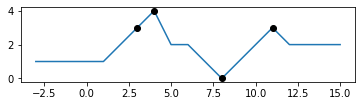

In [24]:
x_list = np.array([1,2,3,3,4,5,5,5,5,6,7,8,9,10,9,8,7])
y_list = np.array([1,2,2,1,1,1,2,3,4,5,4,3,4,5,6,7,8])


x_list = np.array([-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y_list = np.array([1,1,1,1,1,2,3,4,2,2,1,0,1,2,3,2,2,2,2])

step = 2
out_deg = vector_pair_angle(x_list, y_list, step)

print(len(x_list))
print(len(out_deg))
print(out_deg)

turning_idx = np.where(out_deg<135)[0] + step


plt.gca().set_aspect('equal', adjustable='box')

plt.plot(x_list, y_list)
plt.plot(x_list[turning_idx], y_list[turning_idx], 'ko')



In [77]:
x=[1,2,3,4]
print(x[2:])
print(x[:-2])

[3, 4]
[1, 2]
